In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


data = "crypto_data.csv"

In [2]:
#create initial df
df = pd.read_csv(data)
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
#discarding all coins not trading then dropping the IsTrading column
filter_df = df.loc[df['IsTrading'] == True]
filter_df = filter_df.drop('IsTrading', axis=1)

In [4]:
#removing rows with nulls
filter_df = filter_df.dropna(axis=0)

In [5]:
#removing coins that haven't been mined
filter_df = filter_df.loc[filter_df['TotalCoinsMined'] > 0]

In [6]:
#removing CoinName column
filter_df = filter_df.drop('CoinName', axis=1)

In [7]:
#convert features with text values to numeric
final_df = pd.get_dummies(filter_df[['Algorithm', 'ProofType']])

In [8]:
#data frame size comparison
print(f'Both dataframes have 532 rows. Before applying get dummies there were {filter_df.shape[1]} columns and after there are {final_df.shape[1]} columns')

Both dataframes have 532 rows. Before applying get dummies there were 5 columns and after there are 96 columns


In [9]:
#scale data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(final_df)

In [10]:
#pca model
pca = PCA(n_components=0.90)
pca_comp = pca.fit_transform(scaled_df)

In [11]:
#feature size comparison
print(f'Before fitting and transforming with PCA there were {final_df.shape[1]} features and after there are {pca_comp.shape[1]} features')

Before fitting and transforming with PCA there were 96 features and after there are 74 features


<function matplotlib.pyplot.show>

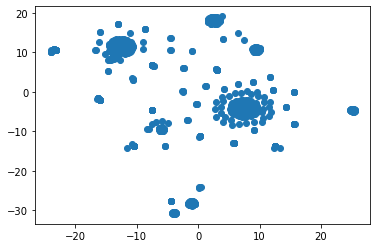

In [12]:
#t-SNE reduction
tsne = TSNE(learning_rate=100)
tsne_features = tsne.fit_transform(pca_comp)

#plot tsne features
X = tsne_features[:,0]
y = tsne_features[:,1]

plt.scatter(X, y)
plt.show

D:\School\Programs\Anaconda\envs\pythondata\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


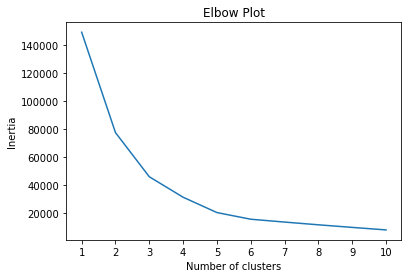

In [13]:
#cluster analysis with k-means
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)


elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)

plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

Based on my findings I would recommend grouping into 5 clusters.